## 实验3 随机算法

### 1. 实现基于贪心策略的近似算法

In [10]:
import numpy as np
import random

'''
## 数据生成
L= 100
#DataX = np.random.randint(0, 100, (L, 1))
DataX = random.sample(range(L), L)
#print(DataX)
#从中选出20个随机数
Select = random.sample(range(len(DataX)), 20)
#print(Select)
#DataX = DataX.tolist()
#print(DataX)
#可行解
Solution = []

S0 = []
Sur = []
for i in range(len(DataX)):
    if Select.count(i) != 0:
        S0.append(DataX[i])
    else:
        Sur.append(DataX[i])
Solution.append(S0)
#print(S1)
#print(Sur)
#动态生成变量名
createVar = locals()
idx = 1
Slen = len(S0)
while len(Sur) > 20:  
    #print('idx: %d' % idx)
    #print('Slen:%d' % Slen)
    #print('len(Sur):%d' %len(Sur))
    temp_s = []
    temp_sur = []
    #产生一个随机数
    #temp_n = random.randrange(1, Slen)#s1的长度
    temp_n = random.randint(1, 20)#s1的长度
    #temp_select = random.sample(range(len(Sur)), temp_n)#从sur中选取的点数
    num_select = random.randint(1, temp_n)#从sur中选取的点数
    num_select2 = temp_n - num_select #从s0中选取的点数
    #放入s1中 从sur的选出x放入s1中，从s0中选出n-x个放入s1
    #sur
    idx_select = random.sample(range(len(Sur)), num_select)
    for i in range(len(Sur)):
        if idx_select.count(i) != 0:
            temp_s.append(Sur[i])
        else:
            temp_sur.append(Sur[i])
    #s0
    idx_select2 = random.sample(range(len(S0)), num_select2)
    for i in range(len(S0)):
        if idx_select2.count(i) != 0:
            temp_s.append(Sur[i])
    if (len(temp_s) != temp_n):
        print('create s1 wrong!')
    
    createVar['S'+ str(idx)] = temp_s
    Sur = []
    Sur = temp_sur
    Solution.append(temp_s)
    #Slen = temp_n
    idx = idx + 1
createVar['S'+ str(idx)] = Sur
Solution.append(Sur)
#print(len(Solution))
for S in Solution:
    print(S, '\n')
'''
##递归函数，产生后续数据 产生下次的数据，输入的是本次的数据，slen是本次的长度，Sur为本次剩余的，idx是本次的
## 封装函数
def CreateDate(L):
    #DataX = np.random.randint(0, 100, (L, 1))
    DataX = random.sample(range(L), L)
    #print(DataX)
    #从中选出20个随机数
    Select = random.sample(range(len(DataX)), 20)
    #print(Select)
    #DataX = DataX.tolist()
    #print(DataX)
    #可行解
    Solution = []

    S0 = []
    Sur = []
    for i in range(len(DataX)):
        if Select.count(i) != 0:
            S0.append(DataX[i])
        else:
            Sur.append(DataX[i])
    Solution.append(S0)
    #动态生成变量名
    createVar = locals()
    idx = 1
    Slen = len(S0)
    while len(Sur) > 20:  
        #print('idx: %d' % idx)
        #print('Slen:%d' % Slen)
        #print('len(Sur):%d' %len(Sur))
        temp_s = []
        temp_sur = []
        #产生一个随机数
        #temp_n = random.randrange(1, Slen)#s1的长度
        temp_n = random.randint(1, 20)#s1的长度
        #temp_select = random.sample(range(len(Sur)), temp_n)#从sur中选取的点数
        num_select = random.randint(1, temp_n)#从sur中选取的点数
        num_select2 = temp_n - num_select #从s0中选取的点数
        #放入s1中 从sur的选出x放入s1中，从s0中选出n-x个放入s1
        #sur
        idx_select = random.sample(range(len(Sur)), num_select)
        for i in range(len(Sur)):
            if idx_select.count(i) != 0:
                temp_s.append(Sur[i])
            else:
                temp_sur.append(Sur[i])
        #s0
        idx_select2 = random.sample(range(len(S0)), num_select2)
        for i in range(len(S0)):
            if idx_select2.count(i) != 0:
                temp_s.append(Sur[i])
        if (len(temp_s) != temp_n):
            print('create s1 wrong!')

        createVar['S'+ str(idx)] = temp_s
        Sur = []
        Sur = temp_sur
        Solution.append(temp_s)
        #Slen = temp_n
        idx = idx + 1
    createVar['S'+ str(idx)] = Sur
    Solution.append(Sur)
    #print(len(Solution))
    return DataX, Solution

In [11]:
#利用贪心算法求解
U, Solution = CreateDate(100)
C = []
'''
while len(U) > 0:
    idx = 0
    ins_len = 0
    for i, So in enumerate(Solution):
        #寻找交集
        ins = list(set(U).intersection(set(So)))
        #print(ins)
        if ins_len < len(ins):
            ins_len = len(ins)
            idx = i
    #用于测试，查看交集
    #print( '\n', list(set(U).intersection(set(Solution[idx]))))
    #从U中去除
    #print(U, '\n')
    U = list(set(U).difference(set(Solution[idx])))
    #print(U)

    C.append(Solution[idx])
for c in C:
    print(c, '\n')
'''

##封装函数
def GreedyProb(U, Solution):
    while len(U) > 0:
        idx = 0
        ins_len = 0
        for i, So in enumerate(Solution):
            #寻找交集
            ins = list(set(U).intersection(set(So)))
            #print(ins)
            if ins_len < len(ins):
                ins_len = len(ins)
                idx = i
        #用于测试，查看交集
        #print( '\n', list(set(U).intersection(set(Solution[idx]))))
        #从U中去除
        #print(U, '\n')
        U = list(set(U).difference(set(Solution[idx])))
        C.append(Solution[idx])
    return C
C = GreedyProb(U, Solution)
for c in C:
    print(c, '\n')

[49, 54, 4, 62, 37, 16, 96, 53, 57, 6, 70, 18, 92, 21, 42, 55, 1, 91, 44, 90] 

[19, 0, 93, 36, 24, 29, 41, 14, 86, 82, 43, 88, 8, 68, 69, 59, 13, 28, 40] 

[46, 87, 32, 66, 97, 56, 7, 84, 19, 0, 15, 32, 11, 36, 31, 76, 23, 41] 

[31, 52, 23, 60, 50, 64, 71, 99, 38, 48, 24, 60, 61, 20] 

[89, 95, 25, 98, 51, 27, 75, 30, 36] 

[15, 33, 9, 83, 2, 81, 74, 15, 78] 

[85, 63, 10, 58, 0, 24, 23] 

[3, 39, 19, 3, 0, 15, 11, 12, 31, 52, 76, 22, 23, 41, 14, 89, 78] 

[11, 78, 61, 20, 34, 65, 17, 45, 19, 11, 24, 29, 78, 20, 88] 

[26, 94, 79, 31, 23, 60, 61] 

[5, 73, 77, 19, 0, 15, 11, 93, 36, 24, 31, 52, 23, 41, 14, 78, 60, 86] 

[47, 35, 15, 31, 41] 

[67, 22, 26] 

[72, 19, 15, 12, 24, 31, 76, 29, 23, 41, 78, 26, 60] 

[12, 76, 22, 80, 19, 93, 31, 23, 60, 20] 



In [12]:
##测试函数
import time
import datetime
import matplotlib.pyplot as plt 


nowTime = lambda t:int(round(t * 1000))

XL = [100, 1000, 5000]
TimeRecord = []
for L in XL:
    t = time.time()
    start = nowTime(t)
    #主体
    D, S = CreateDate(L)
    GreedyProb(D, S)
    
    t = time.time()
    end = nowTime(t)
    gap = end - start
    print(gap)
    TimeRecord.append(gap)

##画图
plt.plot(XL,TimeRecord,label='Frist line',linewidth=3,color='r',marker='o', 
markerfacecolor='blue',markersize=12) 
plt.xlabel('Data Number') 
plt.ylabel('Spend time/ms') 
plt.title('Greedy Prop') 
plt.show() 

2
266


KeyboardInterrupt: 

### 2. 实现一个基于线性规划的近似算法

In [13]:
from pulp import * 

'''
#设置对象
prob = LpProblem('SetCover', LpMinimize)

#设置变量
createVar = locals()
X = []
for idx in range(len(Solution)):
    x = LpVariable('x%s' %str(idx), lowBound=0, upBound=1)
    createVar['x'+ str(idx)] = x
    X.append(x)

#目标函数
z = 0
for i in range(len(X)):
    z += X[i]
prob += z

#载入约束变量 同时存入元素在集族中的频率到count
count = []
for data in DataX:
    factor = []
    for idx in range(len(Solution)):
        if Solution[idx].count(data) != 0:#存在该元素，
            factor.append(idx)
    sum = 0
    #print(factor)
    for fa in factor:
        #print(X[f])
        sum += X[fa]
    prob += sum >= 1
    count.append(len(factor)) 

#求解
status = prob.solve()
print(status)
print("Total Cost of Ingredients per can = ", value(prob.objective))
print(LpStatus[status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
##舍入法
#求最大f
f = max(count)
p = float(1/f)

C1 = []
for i, v in enumerate(prob.variables()):
    if v.varValue > p:
        C1.append(Solution[i])
print('\n')
for c1 in C1:
    print(c1)
'''    
##封装函数
def LinearProg(Data, Solution):
    #设置对象
    prob = LpProblem('SetCover', LpMinimize)
    #设置变量
    createVar = locals()
    X = []
    for idx in range(len(Solution)):
        x = LpVariable('x%s' %str(idx), lowBound=0, upBound=1)
        createVar['x'+ str(idx)] = x
        X.append(x)

    #目标函数
    z = 0
    for i in range(len(X)):
        z += X[i]
    prob += z

    #载入约束变量 同时存入元素在集族中的频率到count
    count = []
    for data in Data:
        factor = []
        for idx in range(len(Solution)):
            if Solution[idx].count(data) != 0:#存在该元素，
                factor.append(idx)
        sum = 0
        #print(factor)
        for fa in factor:
            #print(X[f])
            sum += X[fa]
        prob += sum >= 1
        count.append(len(factor)) 

    #求解
    status = prob.solve()
    '''
    print(status)
    print("Total Cost of Ingredients per can = ", value(prob.objective))
    print(LpStatus[status])
    for v in prob.variables():
        print(v.name, "=", v.varValue) 
    '''

    ##舍入法
    #求最大f
    f = max(count)
    p = float(1/f)

    C1 = []
    for i, v in enumerate(prob.variables()):
        if v.varValue > p:
            C1.append(Solution[i])
    return C1

U, Solution = CreateDate(100)
C1 = LinearProg(U, Solution)
for c1 in C1:
    print(c1)

[33, 26, 27, 18, 20, 77, 5, 65, 29, 12, 63, 69, 38, 10, 13, 70, 23, 34, 82, 44]
[45, 68, 28, 85, 87, 88, 35, 99]
[91, 16, 48, 97, 79, 22, 88, 89]
[22, 86, 78, 59, 42, 36, 72, 39, 75, 87, 31, 47, 79, 86, 89, 0, 84, 81]
[79, 61, 73, 51, 0, 83, 9, 53, 64]
[35, 3, 84, 15, 30, 92, 4, 32, 96, 47, 71, 58, 88, 3, 0, 83, 9, 81, 64, 15]
[54, 98, 14, 43, 56, 57, 55, 80, 24, 37, 67, 47]
[58, 95, 90, 21, 1, 66, 41, 74, 47, 58, 89, 83, 81, 64, 95]
[81, 11, 2]
[83, 87, 88, 53, 2]
[31, 89, 8, 6, 7]
[46, 76, 93]


G:  1
L:  17
G:  254
L:  140
G:  37527
L:  14062


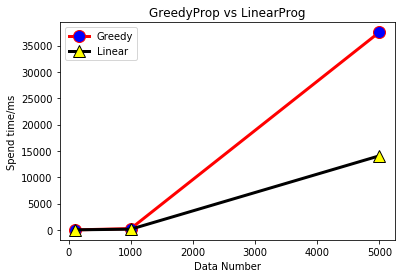

In [14]:
## 测试算法性能
##测试函数
import time
import datetime
import matplotlib.pyplot as plt 


nowTime = lambda t:int(round(t * 1000))

XL = [100, 1000, 5000]
TimeRecord_1 = []
TimeRecord_2 = []
for L in XL:
    D, S = CreateDate(L)
    
    t = time.time()
    start = nowTime(t)
    #主体
    GreedyProb(D, S)
    t = time.time()
    end = nowTime(t)
    gap = end - start
    print('G: ',gap)
    TimeRecord_1.append(gap)
    
    t = time.time()
    start_ = nowTime(t)
    #主体2
    LinearProg(D, S)
    t = time.time()
    end_ = nowTime(t)
    gap2 = end_ - start_
    print('L: ',gap2)
    TimeRecord_2.append(gap2)

##画图
plt.plot(XL,TimeRecord_1,label='Greedy',linewidth=3,color='r',marker='o', 
markerfacecolor='blue',markersize=12) 
plt.plot(XL,TimeRecord_2,label='Linear',linewidth=3,color='k',marker='^', 
markerfacecolor='yellow',markersize=12) 
plt.xlabel('Data Number') 
plt.ylabel('Spend time/ms') 
plt.title('GreedyProp vs LinearProg') 
plt.legend() 
plt.show() 